In [7]:
pip install pandas

In [8]:
import pandas as pd

data = [
    {"invoice_id":1, "storeid":101, "documentdate":"2026-02-20", "netprice":1000, "status":1, "type":"sale"},
    {"invoice_id":2, "storeid":101, "documentdate":"2026-02-20", "netprice":200, "status":1, "type":"return"},
    {"invoice_id":3, "storeid":102, "documentdate":"2026-02-20", "netprice":1500, "status":1, "type":"sale"},
    {"invoice_id":4, "storeid":101, "documentdate":"2026-02-21", "netprice":800, "status":1, "type":"sale"},
    {"invoice_id":5, "storeid":102, "documentdate":"2026-02-21", "netprice":100, "status":1, "type":"return"},
]

df = pd.DataFrame(data)
print(df)

   invoice_id  storeid documentdate  netprice  status    type
0           1      101   2026-02-20      1000       1    sale
1           2      101   2026-02-20       200       1  return
2           3      102   2026-02-20      1500       1    sale
3           4      101   2026-02-21       800       1    sale
4           5      102   2026-02-21       100       1  return


In [9]:
# جدا کردن فروش و مرجوعی
sales = df[(df['type']=='sale') & (df['status']==1)]
returns = df[(df['type']=='return') & (df['status']==1)]

# گروه‌بندی روزانه بر اساس فروشگاه
daily_sales = sales.groupby(['storeid','documentdate'])['netprice'].sum().reset_index().rename(columns={'netprice':'sale_amount'})
daily_returns = returns.groupby(['storeid','documentdate'])['netprice'].sum().reset_index().rename(columns={'netprice':'return_amount'})

# Merge sales و returns
daily_net = pd.merge(daily_sales, daily_returns, how='left', on=['storeid','documentdate'])
daily_net['return_amount'] = daily_net['return_amount'].fillna(0)

# محاسبه Net Sales و شاخص جدید
daily_net['net_sales'] = daily_net['sale_amount'] - daily_net['return_amount']
daily_net['net_sales_div_10'] = daily_net['net_sales'] / 10

print(daily_net)

   storeid documentdate  sale_amount  return_amount  net_sales  \
0      101   2026-02-20         1000          200.0      800.0   
1      101   2026-02-21          800            0.0      800.0   
2      102   2026-02-20         1500            0.0     1500.0   

   net_sales_div_10  
0              80.0  
1              80.0  
2             150.0  


In [10]:
pip install pandas matplotlib

ETL Pipeline Completed! File saved as net_sales_report_20260225.csv
   storeid documentdate  sale_amount  return_amount  net_sales  \
0      101   2026-02-20         1000          200.0      800.0   
1      101   2026-02-21          800            0.0      800.0   
2      102   2026-02-20         1500            0.0     1500.0   

   net_sales_div_10  
0              80.0  
1              80.0  
2             150.0  


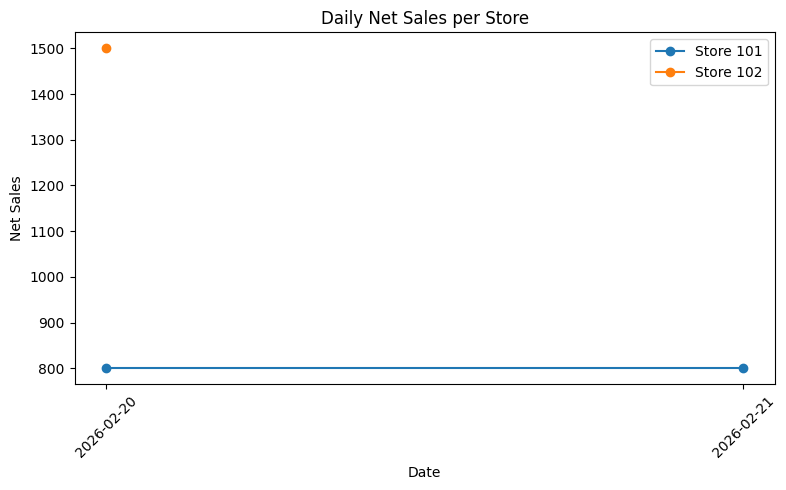

In [11]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

# ---------- Extract ----------
data = [
    {"invoice_id":1, "storeid":101, "documentdate":"2026-02-20", "netprice":1000, "status":1, "type":"sale"},
    {"invoice_id":2, "storeid":101, "documentdate":"2026-02-20", "netprice":200, "status":1, "type":"return"},
    {"invoice_id":3, "storeid":102, "documentdate":"2026-02-20", "netprice":1500, "status":1, "type":"sale"},
    {"invoice_id":4, "storeid":101, "documentdate":"2026-02-21", "netprice":800, "status":1, "type":"sale"},
    {"invoice_id":5, "storeid":102, "documentdate":"2026-02-21", "netprice":100, "status":1, "type":"return"},
]

df = pd.DataFrame(data)

# ---------- Transform ----------
sales = df[(df['type']=='sale') & (df['status']==1)]
returns = df[(df['type']=='return') & (df['status']==1)]

daily_sales = sales.groupby(['storeid','documentdate'])['netprice'].sum().reset_index().rename(columns={'netprice':'sale_amount'})
daily_returns = returns.groupby(['storeid','documentdate'])['netprice'].sum().reset_index().rename(columns={'netprice':'return_amount'})

daily_net = pd.merge(daily_sales, daily_returns, how='left', on=['storeid','documentdate'])
daily_net['return_amount'] = daily_net['return_amount'].fillna(0)
daily_net['net_sales'] = daily_net['sale_amount'] - daily_net['return_amount']
daily_net['net_sales_div_10'] = daily_net['net_sales'] / 10

# ---------- Load ----------
today = date.today().strftime('%Y%m%d')
output_file = f"net_sales_report_{today}.csv"
daily_net.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"ETL Pipeline Completed! File saved as {output_file}")
print(daily_net)

# ---------- Visualization ----------
# رسم نمودار Net Sales روزانه برای هر فروشگاه
fig, ax = plt.subplots(figsize=(8,5))

for store in daily_net['storeid'].unique():
    store_data = daily_net[daily_net['storeid'] == store]
    ax.plot(store_data['documentdate'], store_data['net_sales'], marker='o', label=f'Store {store}')

ax.set_title('Daily Net Sales per Store')
ax.set_xlabel('Date')
ax.set_ylabel('Net Sales')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()